In [347]:
using Eirene
using MAT
using LinearAlgebra
using Statistics
using Printf
using PyPlot
using Distributions
using Random

# Topological data analysis for WSBM networks

## Data loading

In [379]:
datadict = matread(string("test_matrices/sim_data.mat"))

Dict{String,Any} with 12 entries:
  "AssortD"  => [20.0 20.0 … 1.0 1.0; 20.0 20.0 … 1.0 1.0; … ; 1.0 1.0 … 20.0 2…
  "HierarD"  => [20.0 20.0 … 1.0 1.0; 20.0 20.0 … 1.0 1.0; … ; 1.0 1.0 … 20.0 2…
  "CorePS"   => [22.0 18.0 … 17.0 14.0; 18.0 17.0 … 18.0 14.0; … ; 17.0 18.0 … …
  "DominS"   => [18.0 28.0 … 20.0 20.0; 28.0 16.0 … 18.0 15.0; … ; 20.0 18.0 … …
  "OrderedS" => [23.0 20.0 … 0.0 2.0; 20.0 17.0 … 0.0 2.0; … ; 0.0 0.0 … 15.0 1…
  "DissortD" => [5.0 5.0 … 20.0 20.0; 5.0 5.0 … 20.0 20.0; … ; 20.0 20.0 … 5.0 …
  "DissortS" => [4.0 5.0 … 28.0 25.0; 5.0 2.0 … 13.0 32.0; … ; 28.0 13.0 … 4.0 …
  "AssortS"  => [20.0 21.0 … 1.0 0.0; 21.0 22.0 … 1.0 1.0; … ; 1.0 1.0 … 24.0 2…
  "CorePD"   => [20.0 20.0 … 15.0 15.0; 20.0 20.0 … 15.0 15.0; … ; 15.0 15.0 … …
  "OrderedD" => [20.0 20.0 … 1.0 1.0; 20.0 20.0 … 1.0 1.0; … ; 1.0 1.0 … 20.0 2…
  "DominD"   => [20.0 20.0 … 20.0 20.0; 20.0 20.0 … 20.0 20.0; … ; 20.0 20.0 … …
  "HierarS"  => [18.0 19.0 … 1.0 1.0; 19.0 17.0 … 0.0 0.0; … ; 1.0 0.0 … 15

## Utility functions for TDA and plotting

In [366]:
function log_distance(matrix)
    norm = (matrix./maximum(matrix)).+0.001
    dist = abs.(log10.(norm))
    dist[diagind(dist)].= 0; 

    return dist
end 
    
    
function TDA(matrix)
    dist_mat=log_distance(matrix)
    C=eirene(dist_mat,maxdim=1)
    return C
end 

function get_int_labels(C; dim = 0)
    b = barcode(C, dim = dim)
    num = size(b)[1]
    labels = []

    if num > 0
        maxel = maximum(b[map(!,isinf.(b))])+0.001
        b[isinf.(b)].= maxel
        for j in collect(1:num)
            if dim > 0
                repr = sort(collect(Set(classrep(C, class = j, dim = dim)).-1))
            else
                repr = classrep(C, class = j, dim = dim).-1
            end
            push!(labels,string(repr))
        end
    else
        return b,labels
    end    
        
        
    return b,labels
end  

function plot_barcodes(C, title)

    fig, ax = plt.subplots(1,2,figsize=(16,6))
    for dim in [0,1]
        b,labels = get_int_labels(C; dim=dim) 
        idxs = sortperm(b[:,2], rev = false)

        if length(labels)>0
            maxel = maximum(b);
            ax[dim+1].set_yticks(collect(1:length(labels)))
            ax[dim+1].set_yticklabels(labels[idxs]);
            ax[dim+1].hlines(collect(1:length(labels)), b[idxs,1],b[idxs,2])
            ax[dim+1].set_xlim(0,maxel+0.5);  #plt.box(false) #plt.axis("off");
            if dim == 1
                ax[2].tick_params(axis="y",direction="in", pad=0)
            end    

        end
        ax[dim+1].set_title(string("Barcodes arising from homology group dimension ", dim))
    
    end
    plt.suptitle(title, size = 20)
end
    

function write_barcode_to_file(C, filename; maxdim = 1)

    open(filename,"w") do f
        
        for dim in collect(0:maxdim)
        
            b = barcode(C, dim = dim)
            num = size(b)[1]
        
            write(f,string("Dimension: ", dim,"\n"))
            #println(string("Dimension: ", dim,"\n"))
                  
            
            for j in collect(1:num)
    
                ints = @sprintf "[%.3f, %.3f): " b[j,1] b[j,2]
                repr = classrep(C, class = j, dim = dim)
                part1 = @sprintf "[%.3f, %.3f): " b[j,1] b[j,2]
            
                simplList = []
                for i in collect(1:size(repr)[2]) 
                    push!(simplList,"["*join(string.(repr[:,i]),",")*"]")
                end 
            
                part2 = string(part1, join(simplList,"+"),"\n")
                write(f,part2)
            end
        end
        
    end
end

write_barcode_to_file (generic function with 1 method)

## Assortative network example

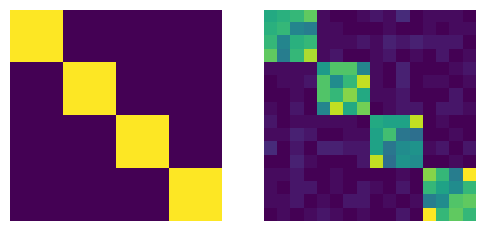

In [367]:
dataD = datadict["AssortD"]
dataS = datadict["AssortS"]
plt.figure(figsize=(6,6))
plt.subplot(1,2,1); plt.imshow(dataD);plt.axis("off");
plt.subplot(1,2,2); plt.imshow(dataS);plt.axis("off");


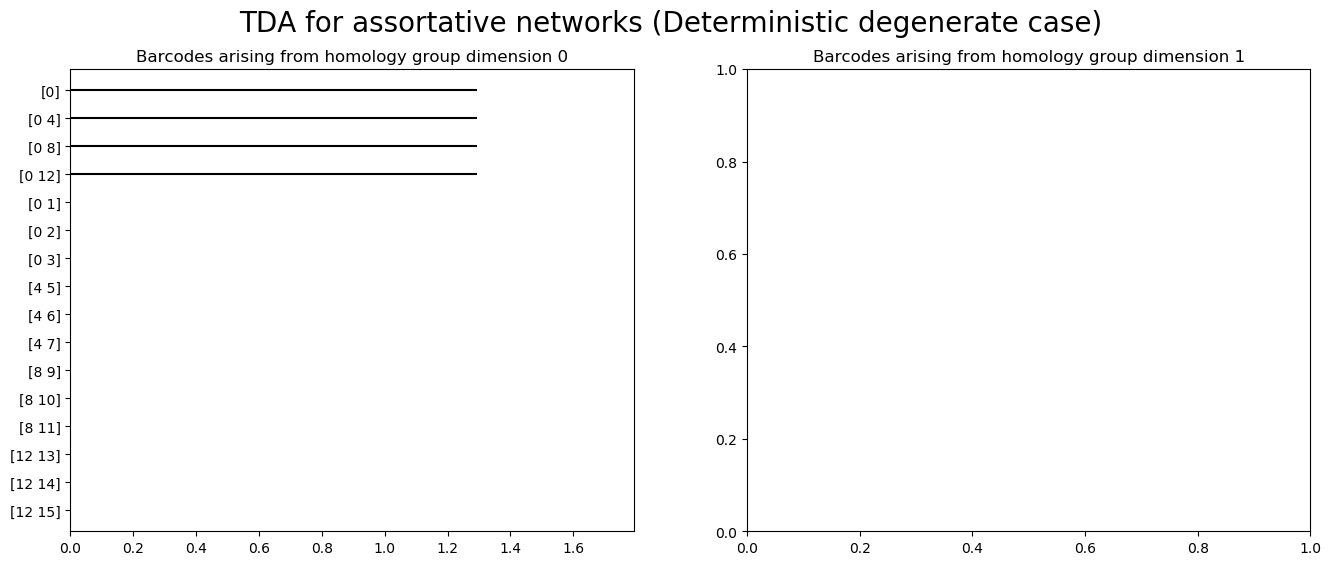

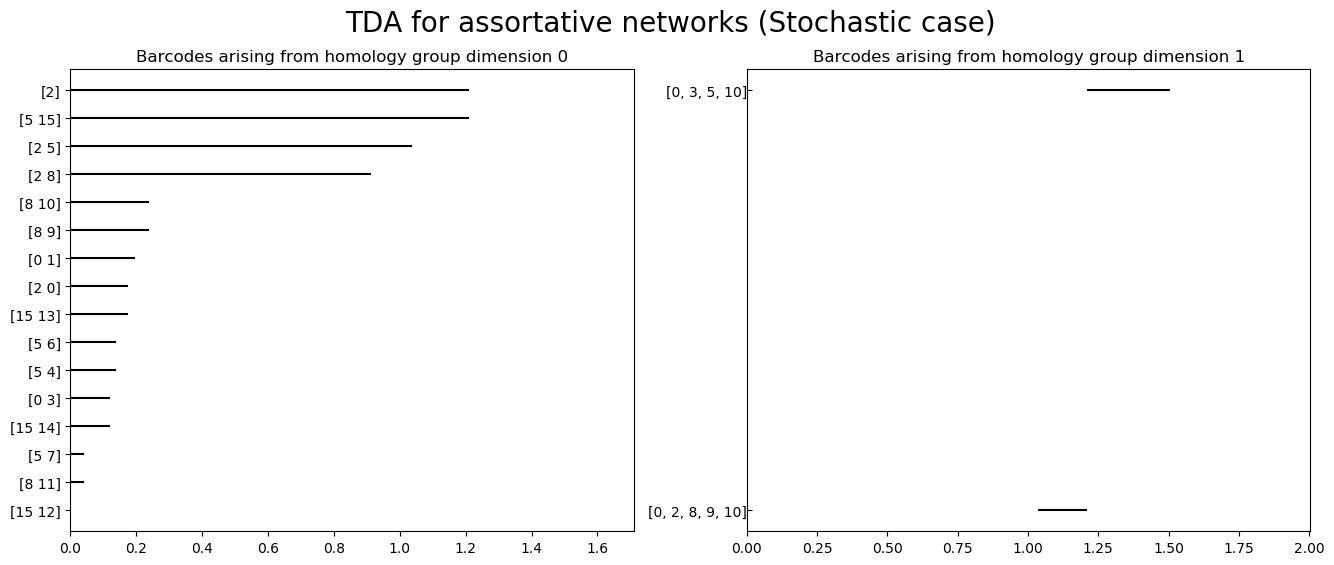

In [368]:
CD=TDA(dataD);
CS=TDA(dataS);
plot_barcodes(CD, "TDA for assortative networks (Deterministic degenerate case)");
plot_barcodes(CS, "TDA for assortative networks (Stochastic case)");

filename = string("ints/ints_assort.txt")
write_barcode_to_file(CS, filename, maxdim = 1)

In [387]:
10^(-0.1)

0.7943282347242815

## Dissortative network example

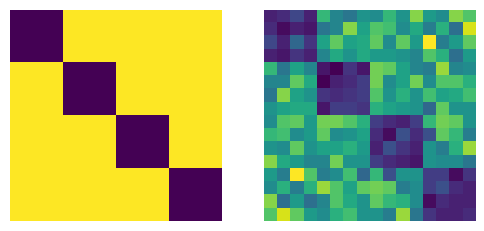

In [377]:
dataD = datadict["DissortD"]
dataS = datadict["DissortS"]
plt.figure(figsize=(6,6))
plt.subplot(1,2,1); plt.imshow(dataD);plt.axis("off");
plt.subplot(1,2,2); plt.imshow(dataS);plt.axis("off");

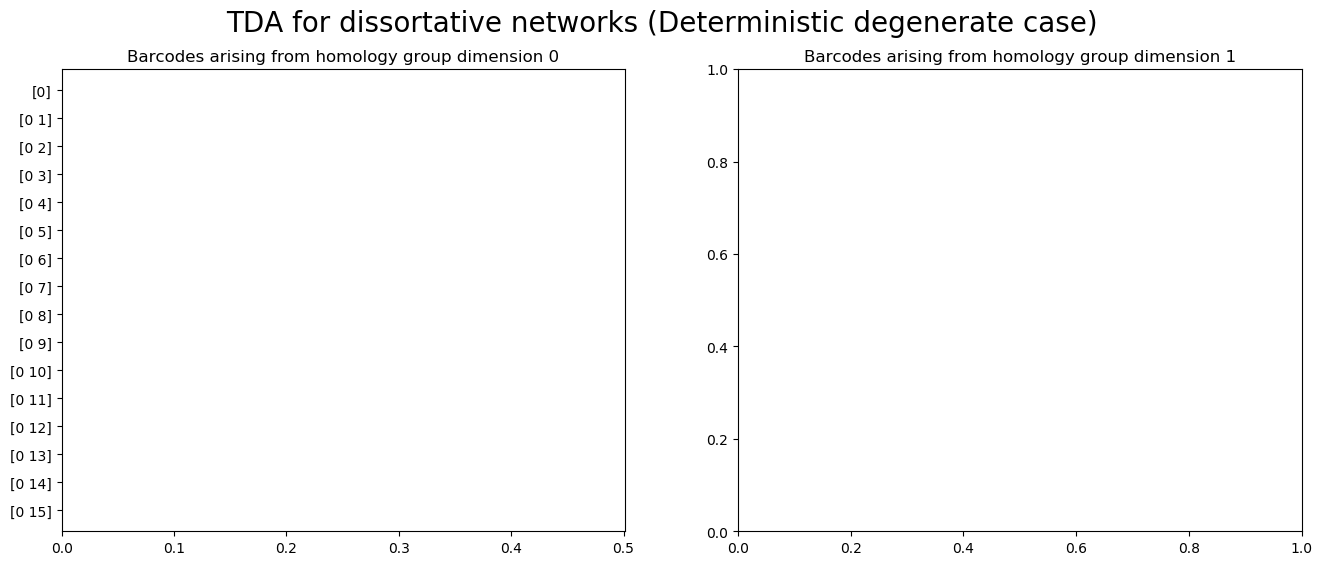

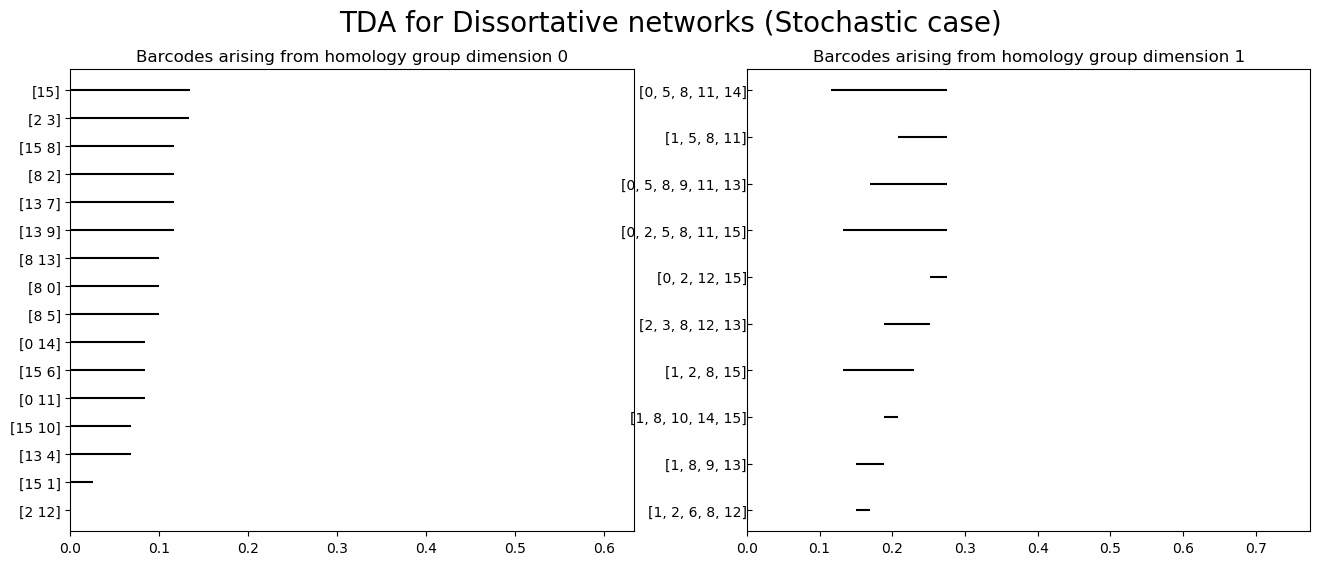

In [378]:
CD=TDA(dataD);
CS=TDA(dataS);
plot_barcodes(CD, "TDA for dissortative networks (Deterministic degenerate case)");
plot_barcodes(CS, "TDA for Dissortative networks (Stochastic case)");

filename = string("ints/ints_dissort.txt")
write_barcode_to_file(CD, filename, maxdim = 1)

## Core-periphery

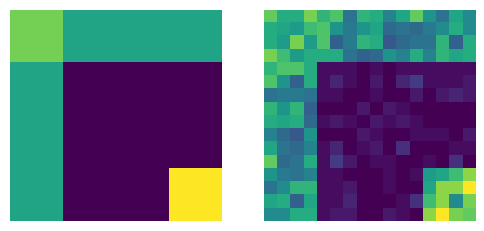

In [372]:
dataD = datadict["CorePD"]
dataS = datadict["CorePS"]
plt.figure(figsize=(6,6))
plt.subplot(1,2,1); plt.imshow(dataD);plt.axis("off");
plt.subplot(1,2,2); plt.imshow(dataS);plt.axis("off");

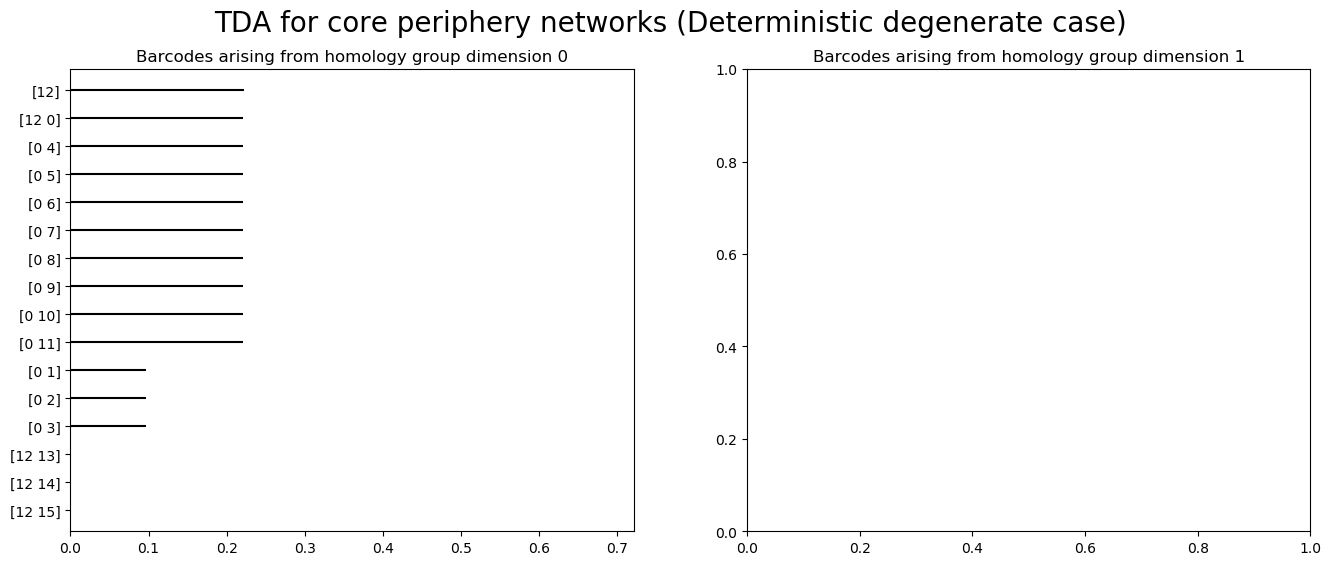

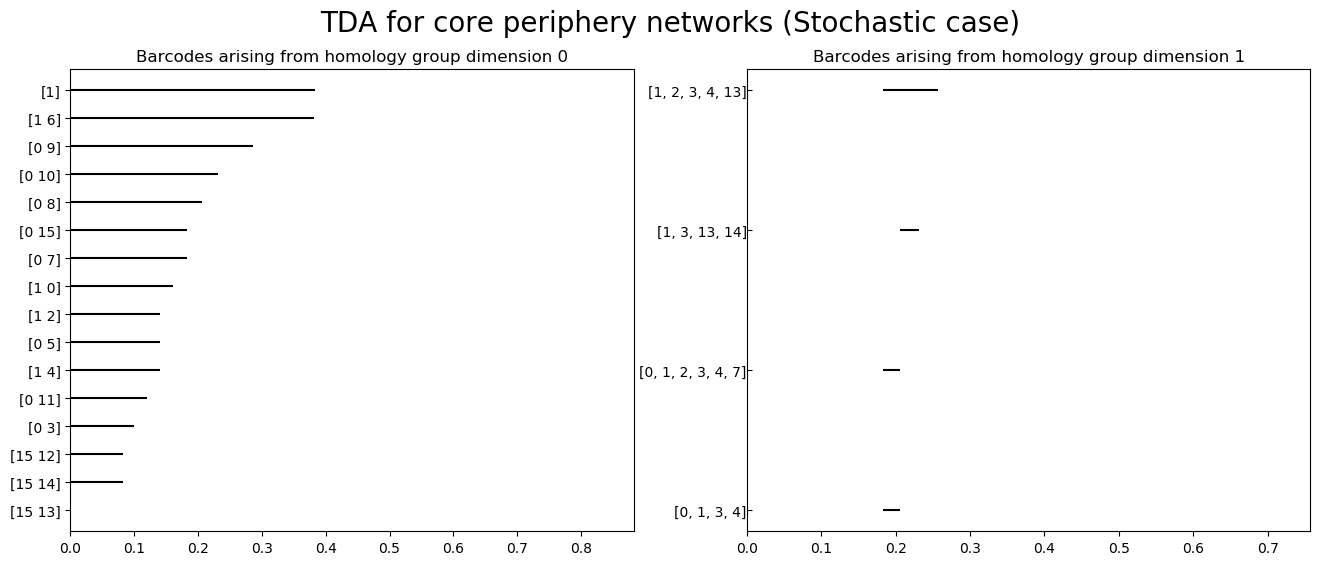

In [373]:
CD=TDA(dataD);
CS=TDA(dataS);
plot_barcodes(CD, "TDA for core periphery networks (Deterministic degenerate case)");
plot_barcodes(CS, "TDA for core periphery networks (Stochastic case)");
filename = string("ints/ints_core.txt")
write_barcode_to_file(CS, filename, maxdim = 1)

## Ordered

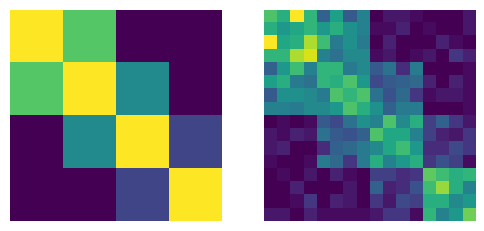

In [374]:
dataD = datadict["OrderedD"]
dataS = datadict["OrderedS"]
plt.figure(figsize=(6,6))
plt.subplot(1,2,1); plt.imshow(dataD);plt.axis("off");
plt.subplot(1,2,2); plt.imshow(dataS);plt.axis("off");

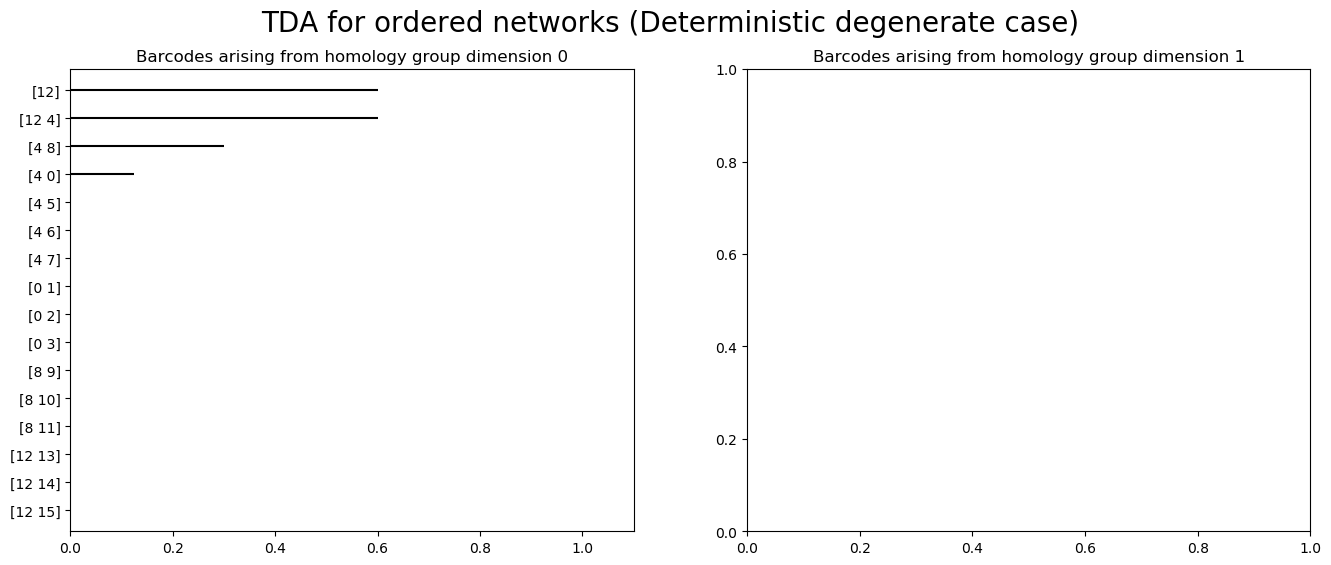

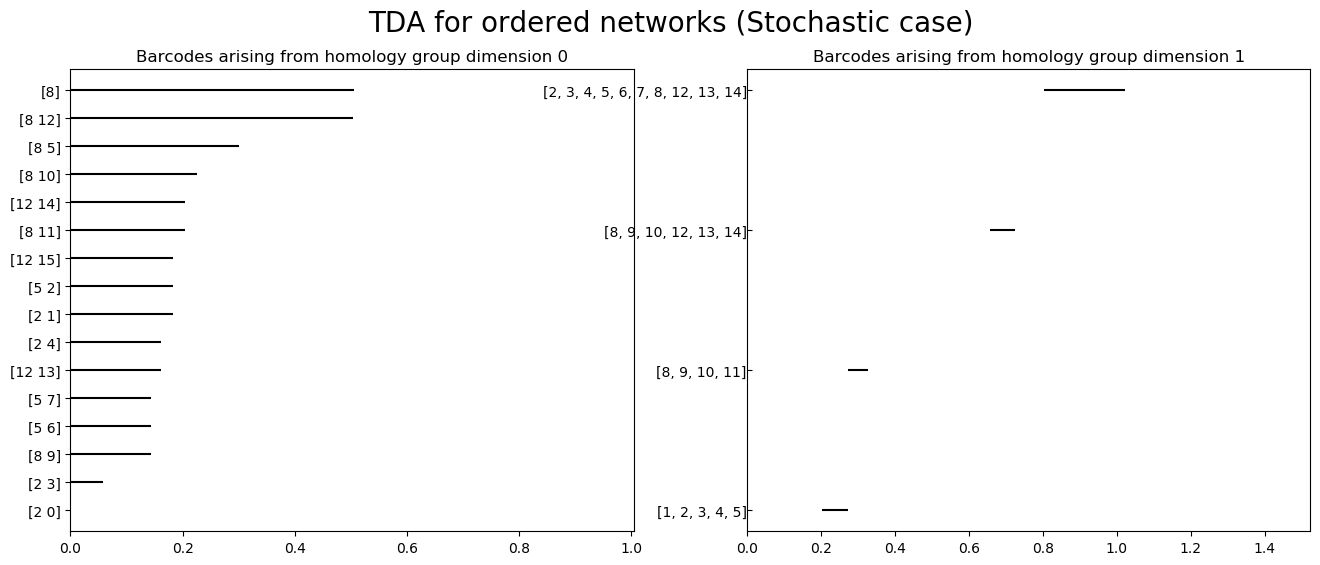

In [375]:
CD=TDA(dataD);
CS=TDA(dataS);
plot_barcodes(CD, "TDA for ordered networks (Deterministic degenerate case)");
plot_barcodes(CS, "TDA for ordered networks (Stochastic case)");
filename = string("ints/ints_ordered.txt")
write_barcode_to_file(CS, filename, maxdim = 1)

## Hierarhical models

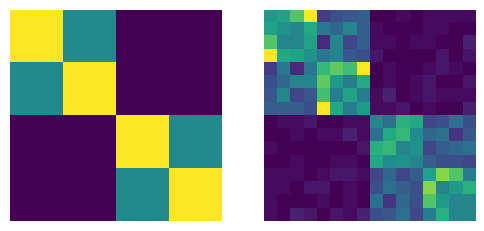

In [381]:
dataD = datadict["HierarD"]
dataS = datadict["HierarS"]
plt.figure(figsize=(6,6))
plt.subplot(1,2,1); plt.imshow(dataD);plt.axis("off");
plt.subplot(1,2,2); plt.imshow(dataS);plt.axis("off");

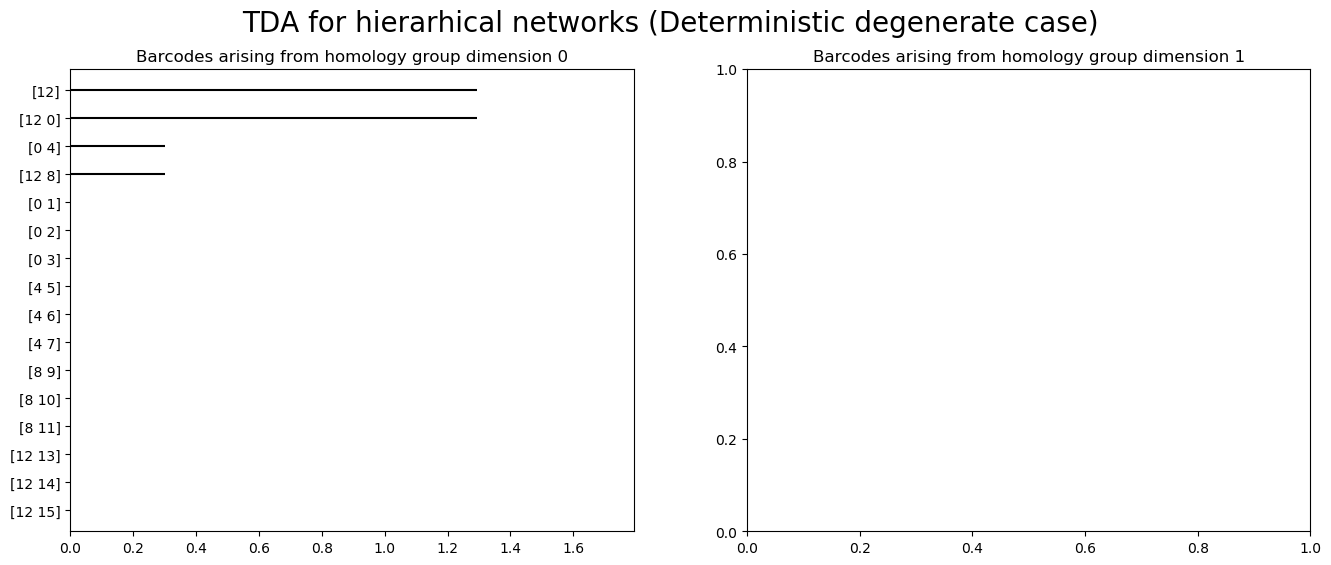

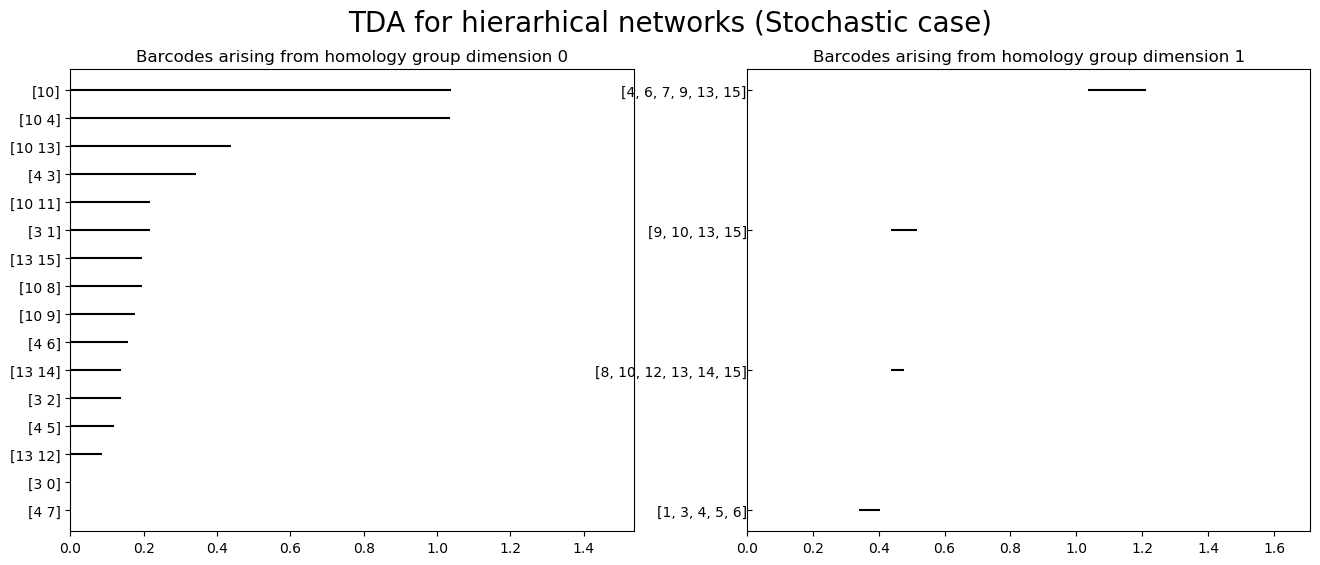

In [382]:
CD=TDA(dataD);
CS=TDA(dataS);
plot_barcodes(CD, "TDA for hierarhical networks (Deterministic degenerate case)");
plot_barcodes(CS, "TDA for hierarhical networks (Stochastic case)");
filename = string("ints/ints_hierarhical.txt")
write_barcode_to_file(CS, filename, maxdim = 1)

## One dominant block

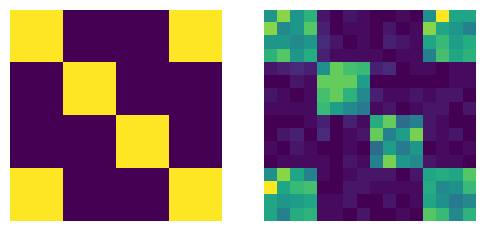

In [384]:
dataD = datadict["DominD"]
dataS = datadict["DominS"]
plt.figure(figsize=(6,6))
plt.subplot(1,2,1); plt.imshow(dataD);plt.axis("off");
plt.subplot(1,2,2); plt.imshow(dataS);plt.axis("off");

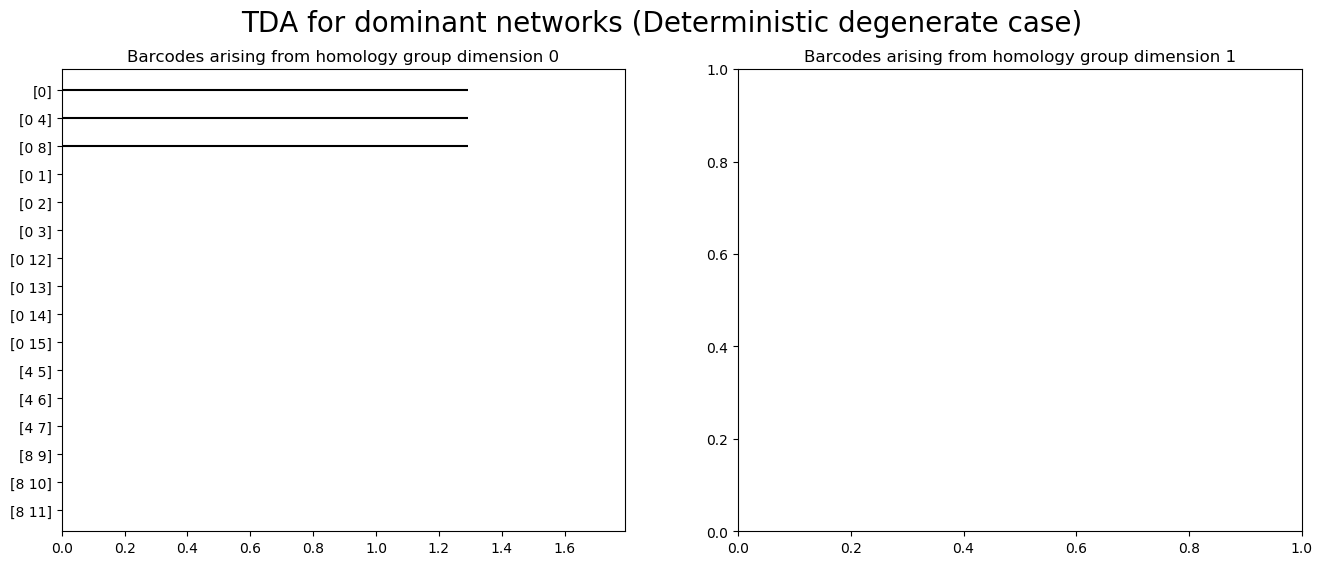

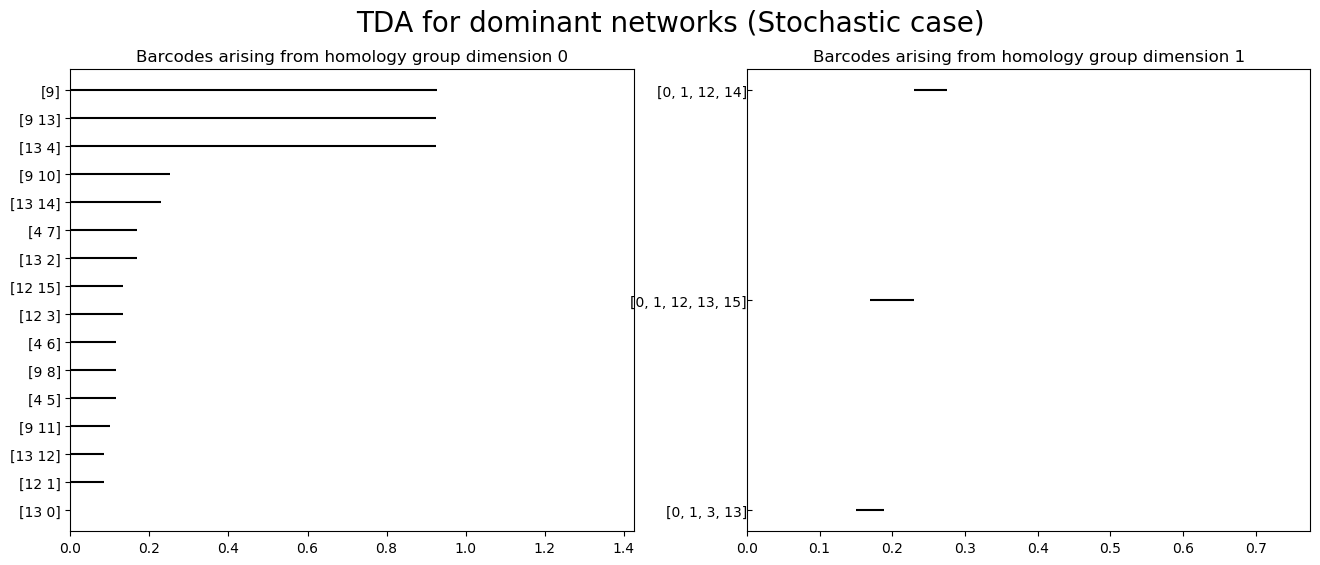

In [385]:
CD=TDA(dataD);
CS=TDA(dataS);
plot_barcodes(CD, "TDA for dominant networks (Deterministic degenerate case)");
plot_barcodes(CS, "TDA for dominant networks (Stochastic case)");
filename = string("ints/ints_dominant.txt")
write_barcode_to_file(CS, filename, maxdim = 1)